In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('PhysicsWallah Hiring Assignment- Business Analyst (1).xlsx')

In [3]:
df.shape

(1201, 11)

In [4]:
df.head()

,Customer ID,Customer Email,Purchase month,Number of user seats bought,Number of users added,Total number of logins,Customer Region,Total number of desktop sessions ran every month,Total number of mobile sessions ran every month,Month churned,Month repurchased
0,11001,poole@xyz.com,January,2,2,16,North America,30,16,NaN,NaN
1,11002,billy@yahoo.com,January,10,4,8,North America,68,12,February,NaN
2,11003,sophie@yahoo.com,January,10,4,8,North America,40,4,February,NaN
3,11004,howard@xyz.com,January,2,2,14,Europe,16,20,NaN,NaN
4,11005,stewart@yahoo.com,January,10,2,4,Asia,12,8,February,NaN


* `Customer ID` - ID assigned to the customer on purchasing the plan.
* `Customer Email` - Email ID using which customer bought the plan which can be gmail/yahoo/xyz(company mail).
* `Purchase Month` - Month in which plan is purchased (January, Februray and March).
* `Number of user seats bought` - Maximum number of user that can be added to the plan (can be 1, 2, 5 or 10 user seats).
* `Number of users added` - Number of user added to the plan.
* `Total number of logins` - Sum of login counts by all user in a plan.
* `Customer Region` - Continent to which the customer belongs.
* `Total number of desktop sessions ran every month` - Total count of desktop sessions ran by all users in a plan.
* `Total number of mobile sessions ran every month` - Total count of mobile sessions ran by all users in a plan.
* `Month churned` - Month in which customer cancelled his/her plan.
* `Month repurchased` - Month in which customer repurchased his cancelled plan again.

In [5]:
# Getting the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Customer ID                                       1201 non-null   int64 
 1   Customer Email                                    1201 non-null   object
 2   Purchase month                                    1201 non-null   object
 3   Number of user seats bought                       1201 non-null   int64 
 4   Number of users added                             1201 non-null   int64 
 5   Total number of logins                            1201 non-null   int64 
 6   Customer Region                                   1201 non-null   object
 7   Total number of desktop sessions ran every month  1201 non-null   int64 
 8   Total number of mobile sessions ran every month   1201 non-null   int64 
 9   Month churned                 

In [6]:
# Separating numercial and categorical features

categorical = []
numerical = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical.append(i)
    else:
        numerical.append(i)
print ('Categorical features --')
print (categorical)
print ('Numerical features --')
print (numerical)

Categorical features --
['Customer Email', 'Purchase month', 'Customer Region', 'Month churned', 'Month repurchased']
Numerical features --
['Customer ID', 'Number of user seats bought', 'Number of users added ', 'Total number of logins ', 'Total number of desktop sessions ran every month', 'Total number of mobile sessions ran every month']


In [7]:
# Describing the numerical features

df.describe()

,Customer ID,Number of user seats bought,Number of users added,Total number of logins,Total number of desktop sessions ran every month,Total number of mobile sessions ran every month
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,11601.000000,4.313905,3.391341,22.218152,34.552873,27.410491
std,346.843144,3.523570,2.825490,23.398804,38.138813,27.095458
min,11001.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,11301.000000,1.000000,1.000000,4.000000,9.000000,8.000000
50%,11601.000000,2.000000,2.000000,12.000000,18.000000,16.000000
75%,11901.000000,5.000000,5.000000,36.000000,45.000000,45.000000
max,12201.000000,10.000000,10.000000,90.000000,190.000000,119.000000


In [8]:
# Checking for null values in each column

df.isnull().sum()

Customer ID                                            0
Customer Email                                         0
Purchase month                                         0
Number of user seats bought                            0
Number of users added                                  0
Total number of logins                                 0
Customer Region                                        0
Total number of desktop sessions ran every month       0
Total number of mobile sessions ran every month        0
Month churned                                        841
Month repurchased                                   1189
dtype: int64

In [9]:
# Checking for number of unique values in each column

df.apply(lambda x: len(x.unique()))

Customer ID                                         1201
Customer Email                                       542
Purchase month                                         3
Number of user seats bought                            4
Number of users added                                  9
Total number of logins                                37
Customer Region                                        3
Total number of desktop sessions ran every month      95
Total number of mobile sessions ran every month       41
Month churned                                          4
Month repurchased                                      4
dtype: int64

In [10]:
# Adding a feature

df['Customer Email'] = df['Customer Email'].str.split('@')
df['Domain'] = df['Customer Email'].apply(lambda x: x[1])

In [11]:
df.head()

,Customer ID,Customer Email,Purchase month,Number of user seats bought,Number of users added,Total number of logins,Customer Region,Total number of desktop sessions ran every month,Total number of mobile sessions ran every month,Month churned,Month repurchased,Domain
0,11001,"[poole, xyz.com]",January,2,2,16,North America,30,16,NaN,NaN,xyz.com
1,11002,"[billy, yahoo.com]",January,10,4,8,North America,68,12,February,NaN,yahoo.com
2,11003,"[sophie, yahoo.com]",January,10,4,8,North America,40,4,February,NaN,yahoo.com
3,11004,"[howard, xyz.com]",January,2,2,14,Europe,16,20,NaN,NaN,xyz.com
4,11005,"[stewart, yahoo.com]",January,10,2,4,Asia,12,8,February,NaN,yahoo.com


In [12]:
df['Domain'].value_counts()

xyz.com      900
gmail.com    182
yahoo.com    119
Name: Domain, dtype: int64

In [13]:
df['Domain'] = df['Domain'].replace({'xyz.com':'Office', 'gmail.com':'Home', 'yahoo.com':'Home'})

In [14]:
df.head()

,Customer ID,Customer Email,Purchase month,Number of user seats bought,Number of users added,Total number of logins,Customer Region,Total number of desktop sessions ran every month,Total number of mobile sessions ran every month,Month churned,Month repurchased,Domain
0,11001,"[poole, xyz.com]",January,2,2,16,North America,30,16,NaN,NaN,Office
1,11002,"[billy, yahoo.com]",January,10,4,8,North America,68,12,February,NaN,Home
2,11003,"[sophie, yahoo.com]",January,10,4,8,North America,40,4,February,NaN,Home
3,11004,"[howard, xyz.com]",January,2,2,14,Europe,16,20,NaN,NaN,Office
4,11005,"[stewart, yahoo.com]",January,10,2,4,Asia,12,8,February,NaN,Home


In [15]:
df['Domain'].value_counts()

Office    900
Home      301
Name: Domain, dtype: int64

# Exploratory Data Analysis

In [16]:
# Setting theme for the plots

sns.set()

In [17]:
numerical

['Customer ID',
 'Number of user seats bought',
 'Number of users added ',
 'Total number of logins ',
 'Total number of desktop sessions ran every month',
 'Total number of mobile sessions ran every month']

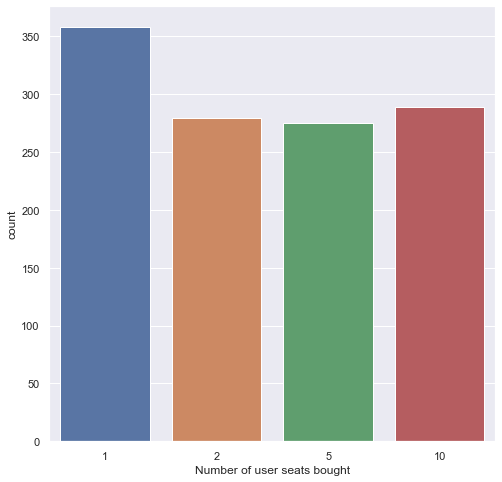

In [18]:
# Distribution of user seats bought

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Number of user seats bought')
plt.show()

In [19]:
# Getting the exact value

df['Number of user seats bought'].value_counts()

1     358
10    289
2     279
5     275
Name: Number of user seats bought, dtype: int64

* Most of the users took a plan with `1 user seat`, which means most people bought the plan for themselves.
* Significant amount of people bought a plan in which 10 people can be added, which can be for an `office`.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


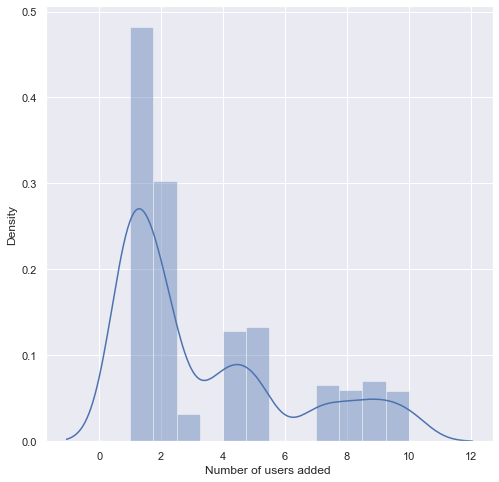

In [20]:
# Distribution of user added

plt.figure(figsize = (8, 8))
sns.distplot(df['Number of users added '])
plt.show()

* Mostly `1 to 2 users` were added to a plan.

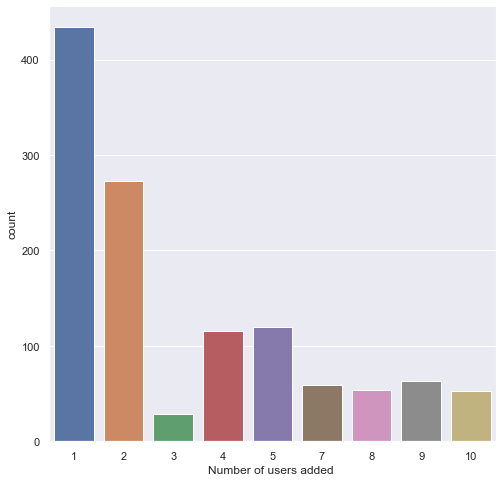

In [21]:
plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Number of users added ')
plt.show()

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


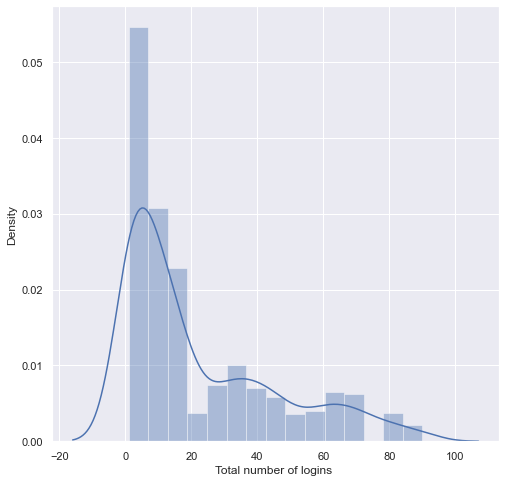

In [22]:
# Distribution of total number of logins

plt.figure(figsize = (8, 8))
sns.distplot(df['Total number of logins '])
plt.show()

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


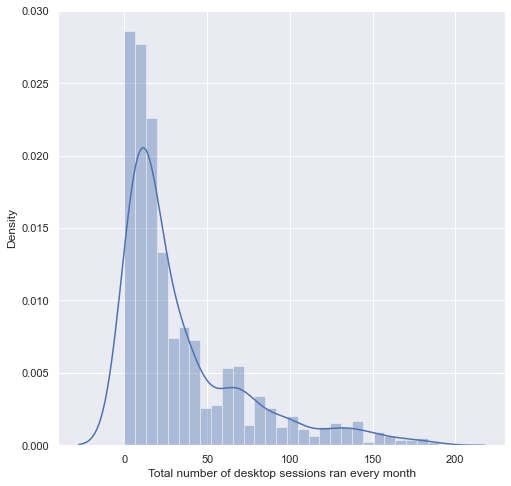

In [23]:
# Distribution of total number of desktop session every month

plt.figure(figsize = (8, 8))
sns.distplot(df['Total number of desktop sessions ran every month'])
plt.show()

* Most of the user had `0 to 45` desktop sessions every month.
* Desktop sessions more than 100 is rare.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


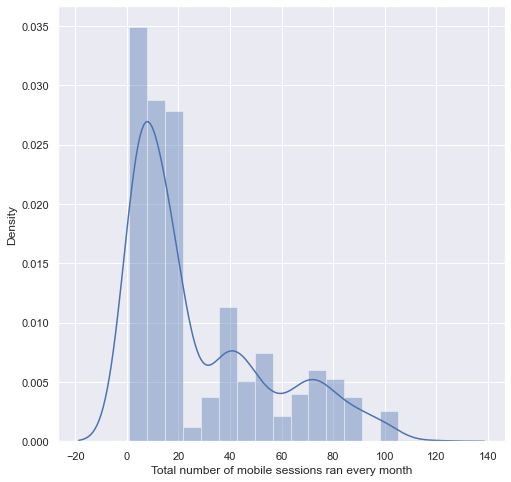

In [24]:
# Distribution of total number of mobile session every month

plt.figure(figsize = (8, 8))
sns.distplot(df['Total number of mobile sessions ran every month'])
plt.show()

* Most of the user had `0 to 20` mobile sessions every month.
* Users having more than 80 mobile sessions in a month are rare.

In [25]:
print('Total desktop sessions in a month:', sum(df['Total number of desktop sessions ran every month']))
print('Total mobile sessions in a month:', sum(df['Total number of mobile sessions ran every month']))

Total desktop sessions in a month: 41498
Total mobile sessions in a month: 32920


* Users preferred to have `sessions on desktop than laptop`.

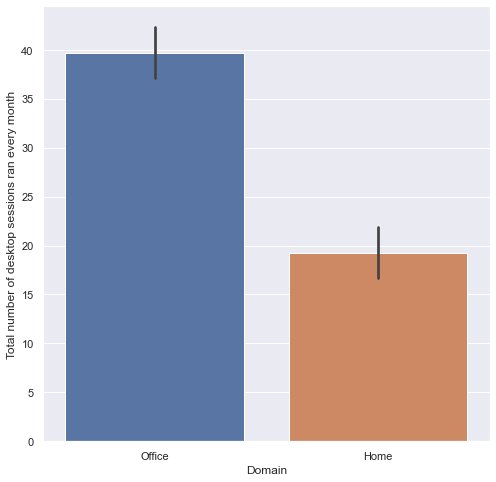

In [26]:
# Distribution of desktop sessions based on home and office.

plt.figure(figsize = (8, 8))
sns.barplot(data = df, y = 'Total number of desktop sessions ran every month', x = 'Domain')
plt.show()

* Users are more convenient in having `desktop sessions at office`.

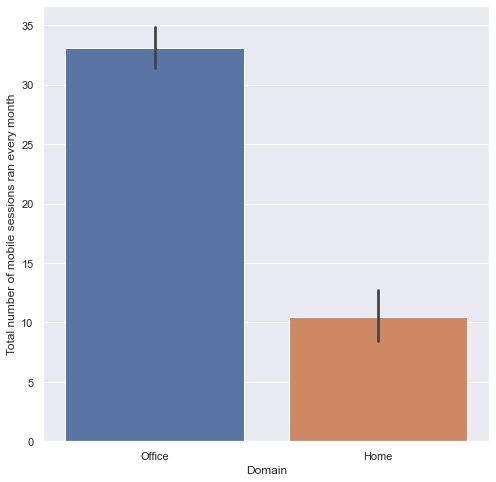

In [27]:
# Distribution of mobile sessions based on home and office.

plt.figure(figsize = (8, 8))
sns.barplot(data = df, y = 'Total number of mobile sessions ran every month', x = 'Domain')
plt.show()

* More number of mobile sessions were held at office.
* `Both desktop and mobile sessions are widely used in offices.`

In [28]:
numerical

['Customer ID',
 'Number of user seats bought',
 'Number of users added ',
 'Total number of logins ',
 'Total number of desktop sessions ran every month',
 'Total number of mobile sessions ran every month']

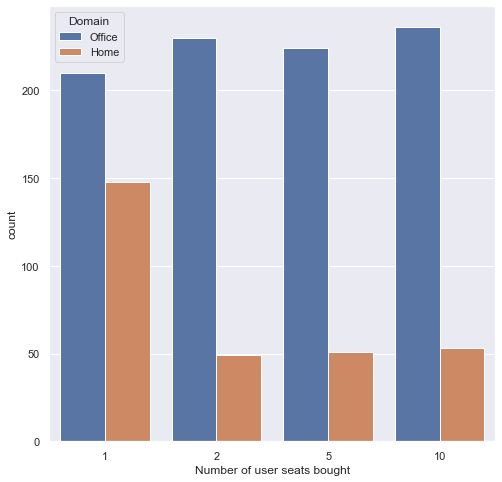

In [29]:
# Distribution of number of seats bought based on home and office.

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Number of user seats bought', hue = 'Domain')
plt.show()

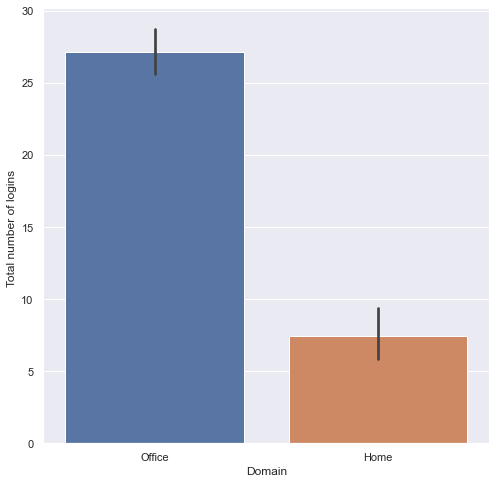

In [30]:
# Distribution of number of logins based on home and office.

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Domain', y = 'Total number of logins ')
plt.show()

In [31]:
categorical

['Customer Email',
 'Purchase month',
 'Customer Region',
 'Month churned',
 'Month repurchased']

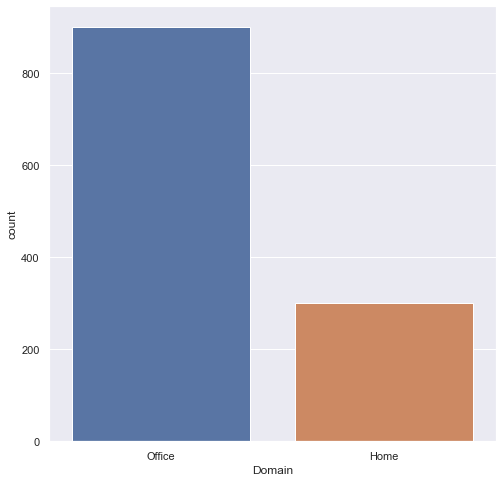

In [32]:
# Distribution of customers on the basis of email id they used for purchasing the plan (either office or home)

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Domain')
plt.show()

* Maximum customers used `office email` to purchase the plan.

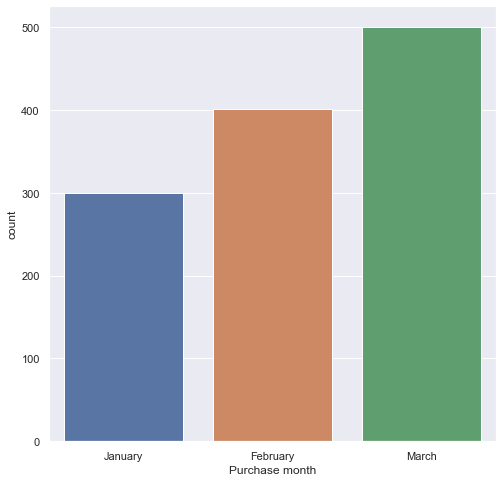

In [33]:
# Distribution of puchase month

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Purchase month')
plt.show()

* Most of the plans were purchased in `March`.
* Least plans were purchased in January.

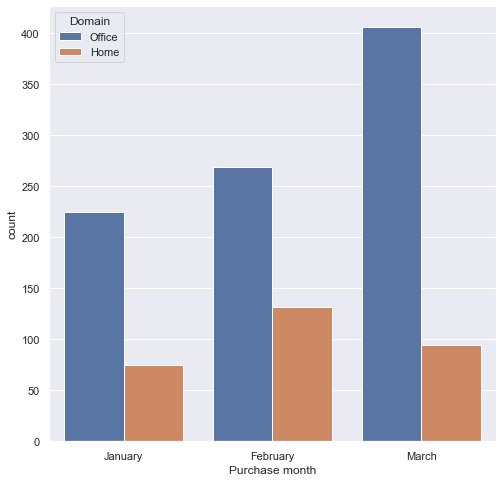

In [34]:
# Distribution of puchase month based on domain

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Purchase month', hue = 'Domain')
plt.show()

* Most of the `office plans` were purchsed in `March`.
* Most of the personal plans were purchased in `February`.
* Least personal plans were bought in January.

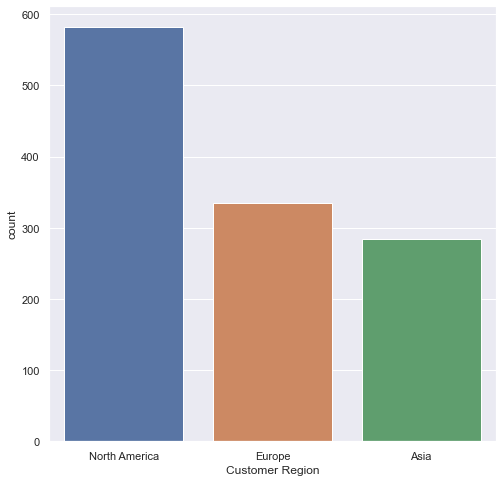

In [35]:
# Distribution of customer's region

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Customer Region')
plt.show()

* People from `North America` bought most of the plans.

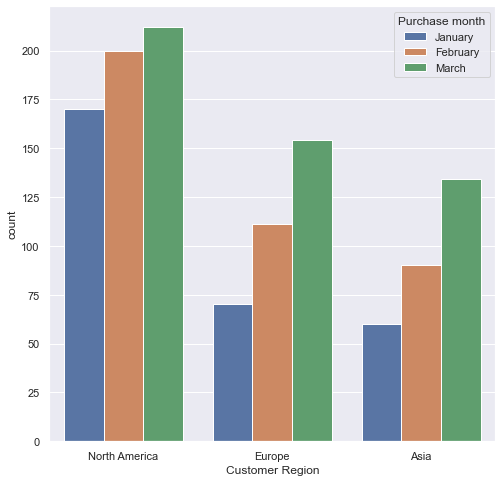

In [36]:
# Distribution of customer's region based on purchase month

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Customer Region', hue = 'Purchase month')
plt.show()

* People from North America purchased maximum plans in all the three months when compared to other continents.

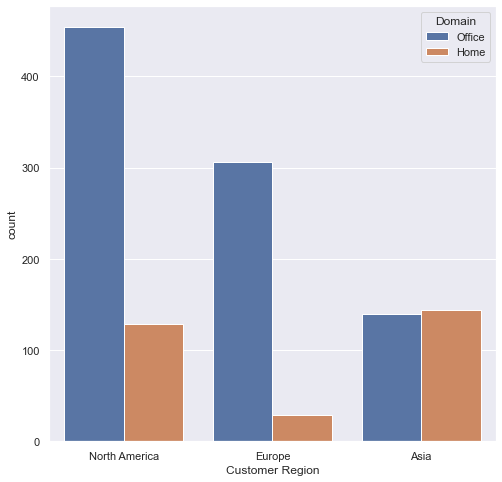

In [37]:
# Distribution of customer's region based on domain

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Customer Region', hue = 'Domain')
plt.show()

* North America has maximum number of plans for `office`.
* Europe has least number of plans for `personal use`.
* `Asia has almost equal number of plans for both office and home usage.`

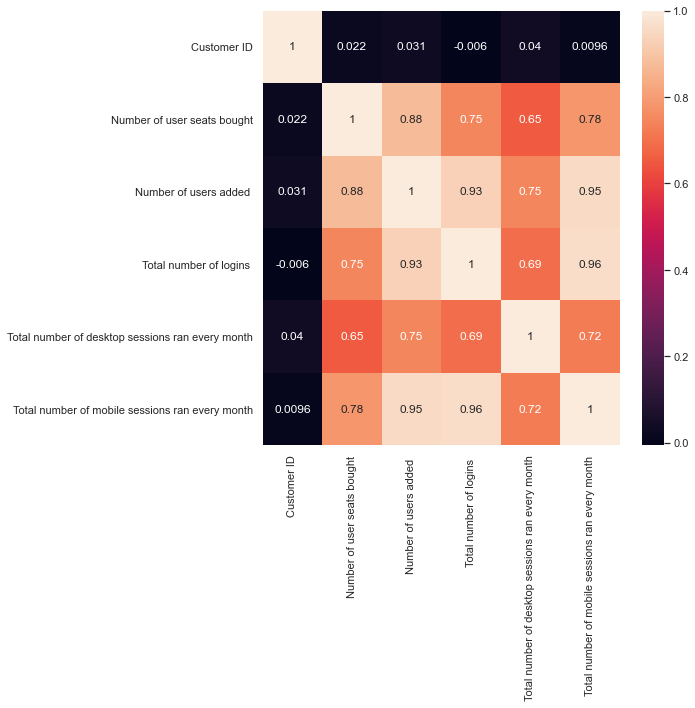

In [38]:
# Checking the correlation

plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [39]:
df.head()

,Customer ID,Customer Email,Purchase month,Number of user seats bought,Number of users added,Total number of logins,Customer Region,Total number of desktop sessions ran every month,Total number of mobile sessions ran every month,Month churned,Month repurchased,Domain
0,11001,"[poole, xyz.com]",January,2,2,16,North America,30,16,NaN,NaN,Office
1,11002,"[billy, yahoo.com]",January,10,4,8,North America,68,12,February,NaN,Home
2,11003,"[sophie, yahoo.com]",January,10,4,8,North America,40,4,February,NaN,Home
3,11004,"[howard, xyz.com]",January,2,2,14,Europe,16,20,NaN,NaN,Office
4,11005,"[stewart, yahoo.com]",January,10,2,4,Asia,12,8,February,NaN,Home


## Churn analysis

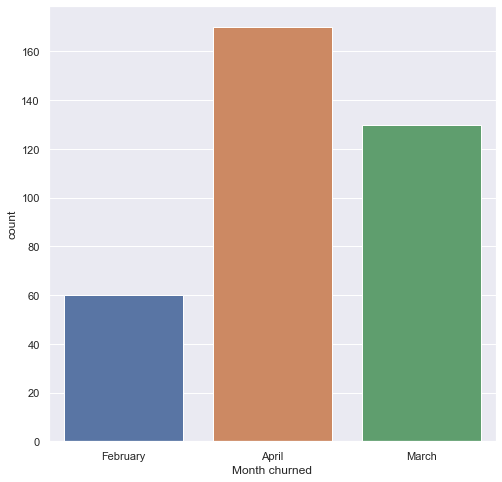

In [40]:
# Distribution of customer churned monthwise

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Month churned')
plt.show()

* Most of the customers churned in `April`.
* Significant number of customers churned out in March.
* Least number of customers left in February.

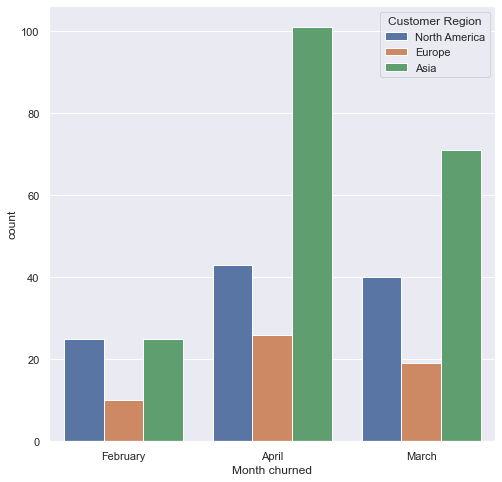

In [41]:
# Distribution of customer churned monthwise based on customer's region

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Month churned', hue = 'Customer Region')
plt.show()

* Huge number of people churned out in april from all the 3 continents.
* `Asia` has the highest churn in april.

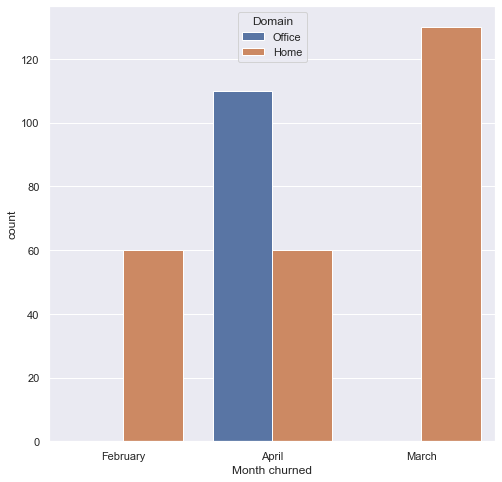

In [42]:
# Distribution of customer churned monthwise based on domain

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Month churned', hue = 'Domain')
plt.show()

* `None of the office user` left the plan in february and march.
* In april, many office users left the plan.
* In march, highest number of plans were left by domestic users.

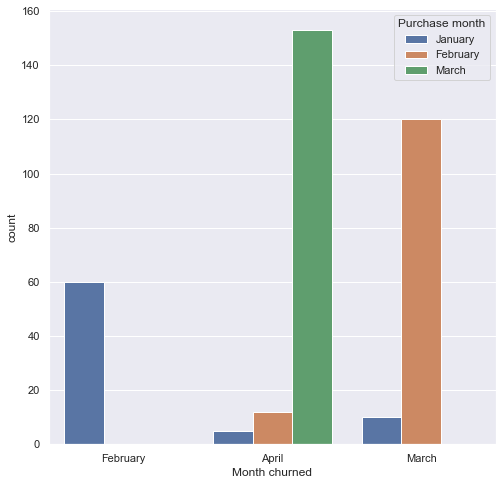

In [43]:
# Distribution of customer churned monthwise based on purchase month

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Month churned', hue = 'Purchase month')
plt.show()

* Most of the customers are `leaving the plan after around 1 month of usage`. 

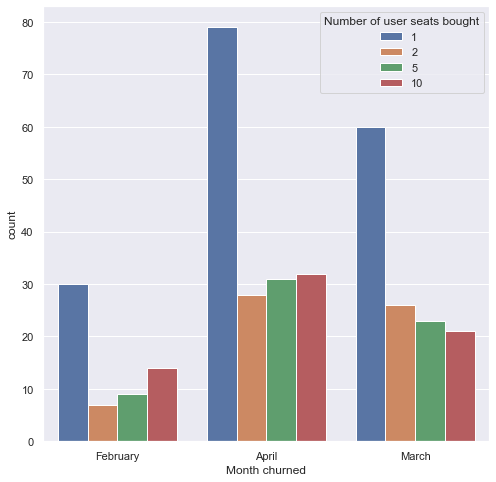

In [44]:
# Distribution of customer churned monthwise based on number of seats bought

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Month churned', hue = 'Number of user seats bought')
plt.show()

* 1 seat - Personal use ; 2 seats - Domestic use ; 5 and 10 seats - Office/Company use
* People with a `plan of 1 seat` left the plan the most.
* People with office plan or company usage churned the least.

In [45]:
df['Number of users added '].value_counts()

1     434
2     273
5     120
4     116
9      63
7      59
8      54
10     53
3      29
Name: Number of users added , dtype: int64

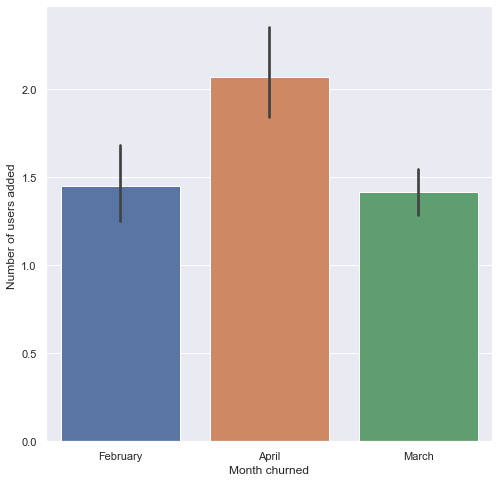

In [46]:
# Distribution of customer churned monthwise based on number of users added

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Month churned', y = 'Number of users added ')
plt.show()

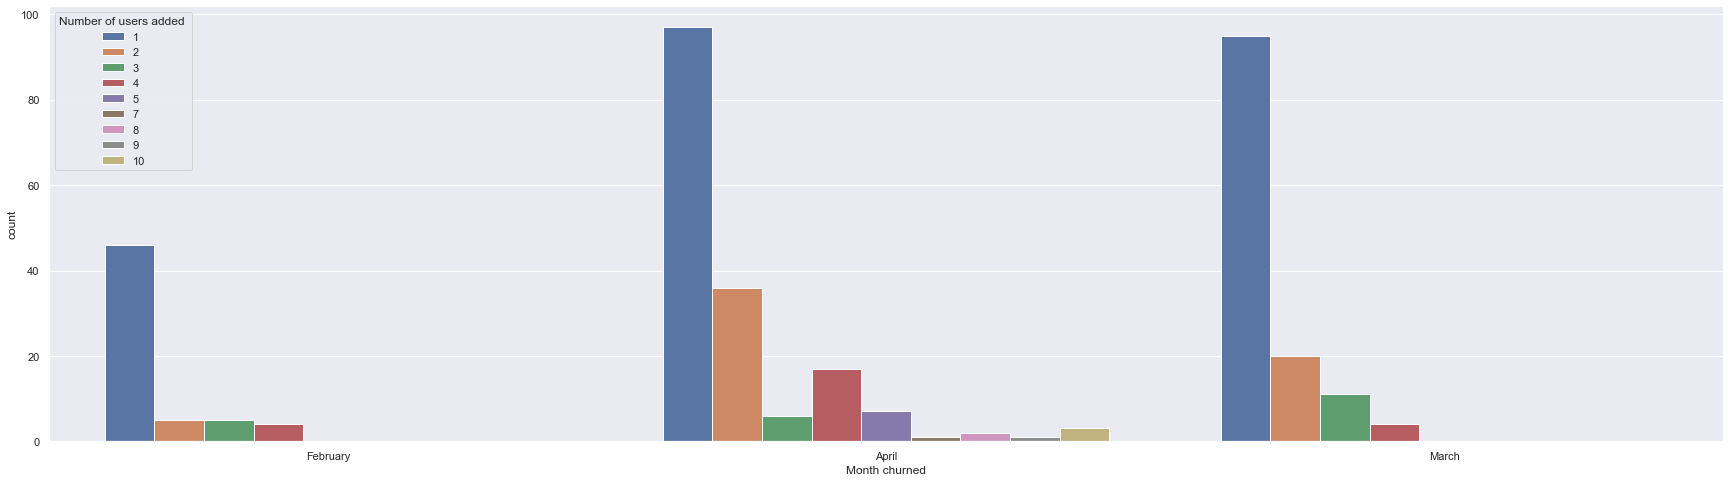

In [47]:
plt.figure(figsize = (30, 8))
sns.countplot(data = df, x = 'Month churned', hue = 'Number of users added ')
plt.show()

* `Single user plans` are left the most.

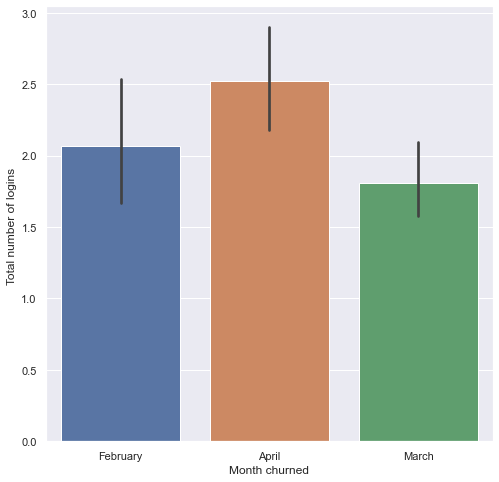

In [48]:
# Distribution of customer churned monthwise based on number of logins

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Month churned', y = 'Total number of logins ')
plt.show()

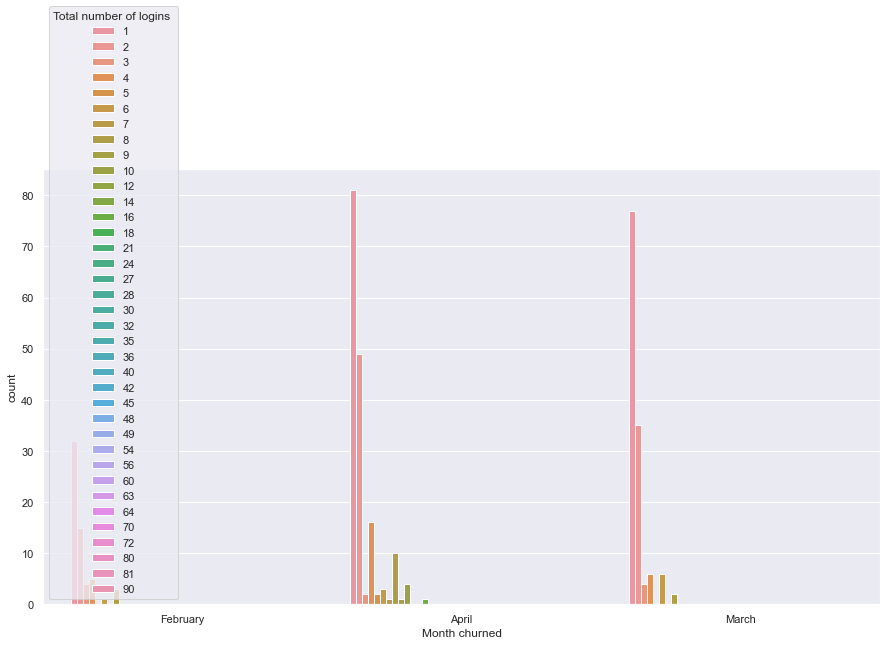

In [49]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df, x = 'Month churned', hue = 'Total number of logins ')
plt.show()

* Most of the users who left the plan `haven't logged in` frequently.
* People were not using the plan they purchased.

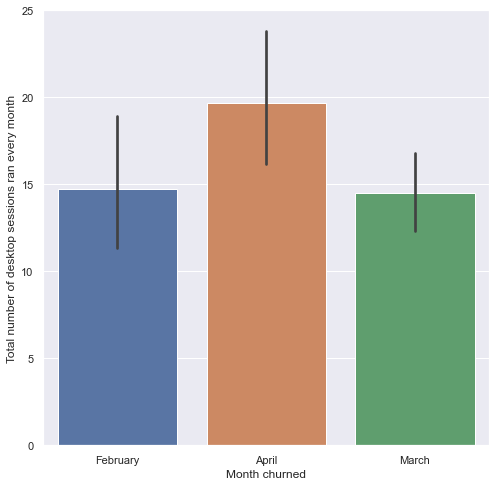

In [50]:
# Distribution of customers churned monthwise on the basis of desktop sessions

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Month churned', y = 'Total number of desktop sessions ran every month')
plt.show()

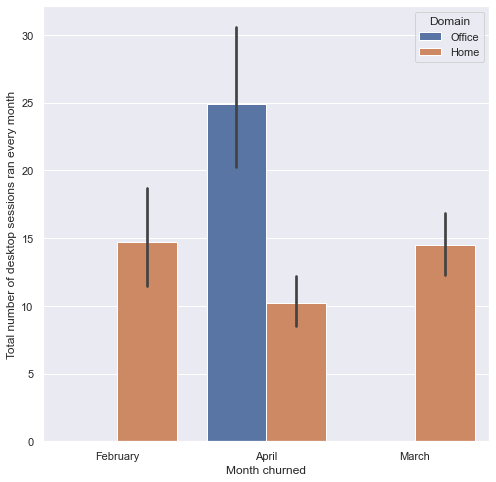

In [51]:
# Distribution of customers churned monthwise on the basis of desktop sessions and domain

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Month churned', y = 'Total number of desktop sessions ran every month', hue = 'Domain')
plt.show()

* Most of the company people left the plan in april, who used to have more number of desktop sessions.
* Most of the people who took the domestic plan and frequently used desktop, left the plan in february.

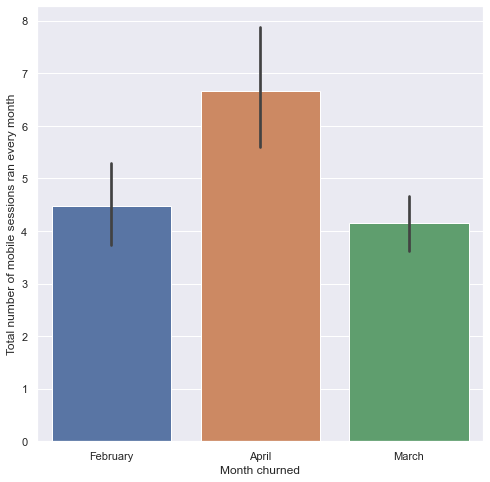

In [52]:
# Distribution of customers churned monthwise on the basis of mobile sessions

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Month churned', y = 'Total number of mobile sessions ran every month')
plt.show()

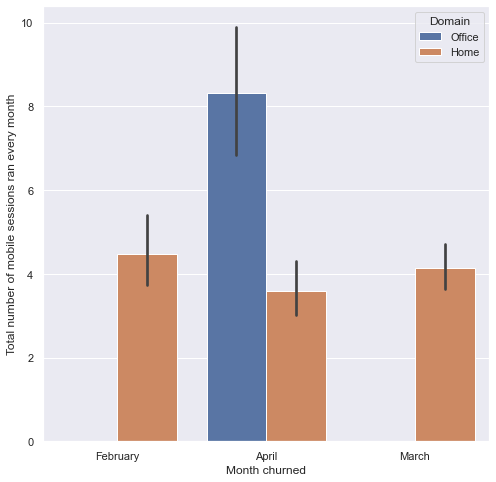

In [53]:
# Distribution of customers churned monthwise on the basis of mobile sessions and domain

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Month churned', y = 'Total number of mobile sessions ran every month', hue = 'Domain')
plt.show()

## Repurchase analysis

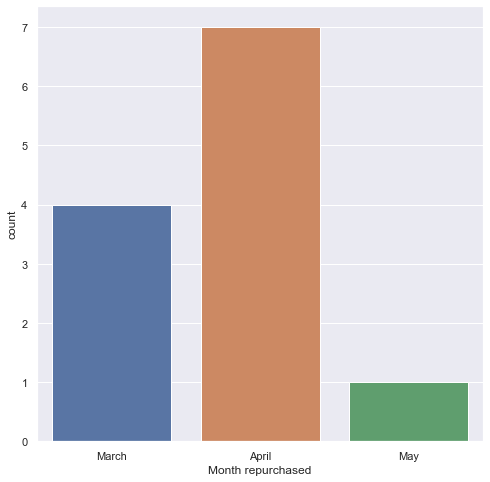

In [55]:
# Distribution of customer repurchased the plan monthwise

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Month repurchased')
plt.show()

* Most of the customers repurchased the plan in `April`.
* Also, most of the customers left the plan in april.
* Least people repurchased the plan in may.

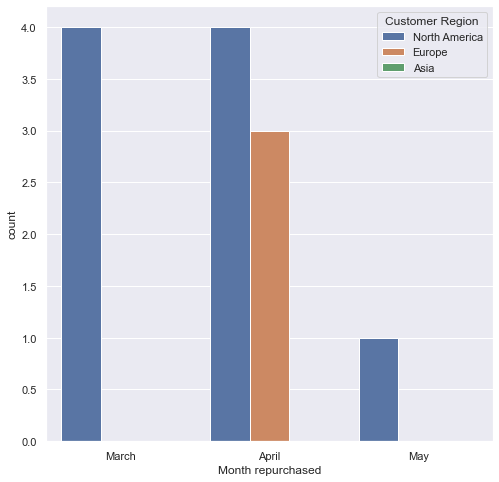

In [56]:
# Distribution of customer repurchases monthwise based on customer's region

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Month repurchased', hue = 'Customer Region')
plt.show()

* Customers from North America repurchased the most.
* `People from Asia didn't repurchased any plan`.

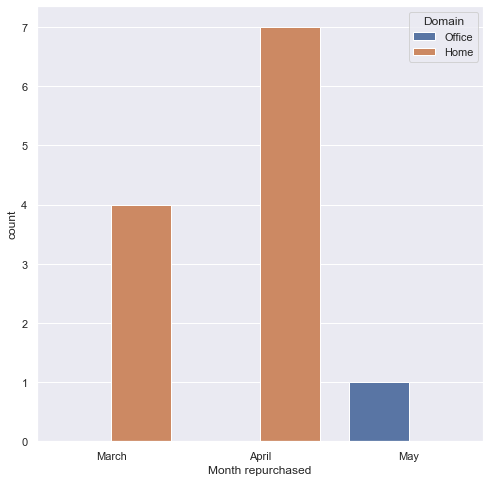

In [57]:
# Distribution of customer repurchased monthwise based on domain

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Month repurchased', hue = 'Domain')
plt.show()

* Most repurchase were made by `domestic customers`.

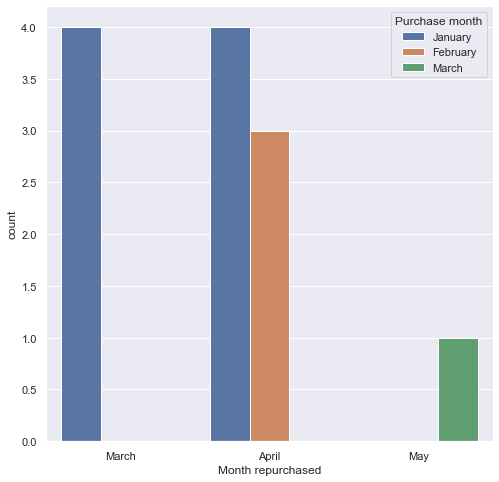

In [58]:
# Distribution of customer repurchased monthwise based on purchase month

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Month repurchased', hue = 'Purchase month')
plt.show()

* Most of the people who repurchased the plan had previously purchased the plan in `Jaunuary`.

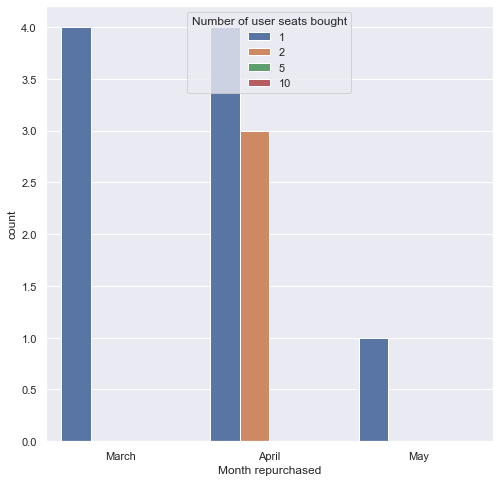

In [59]:
# Distribution of customer repurchased monthwise based on number of seats bought

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Month repurchased', hue = 'Number of user seats bought')
plt.show()

* `Single user plan` were repurchased the most.

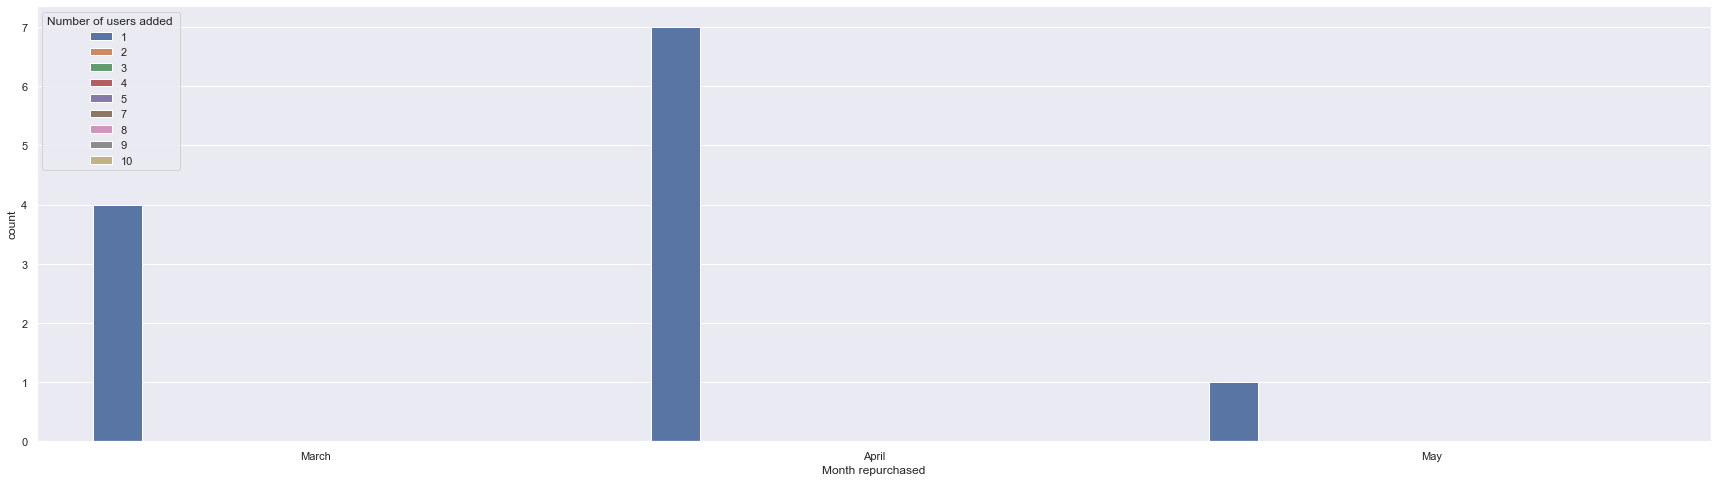

In [60]:
# Distribution of customer repurchased monthwise based on number of users added

plt.figure(figsize = (30, 8))
sns.countplot(data = df, x = 'Month repurchased', hue = 'Number of users added ')
plt.show()

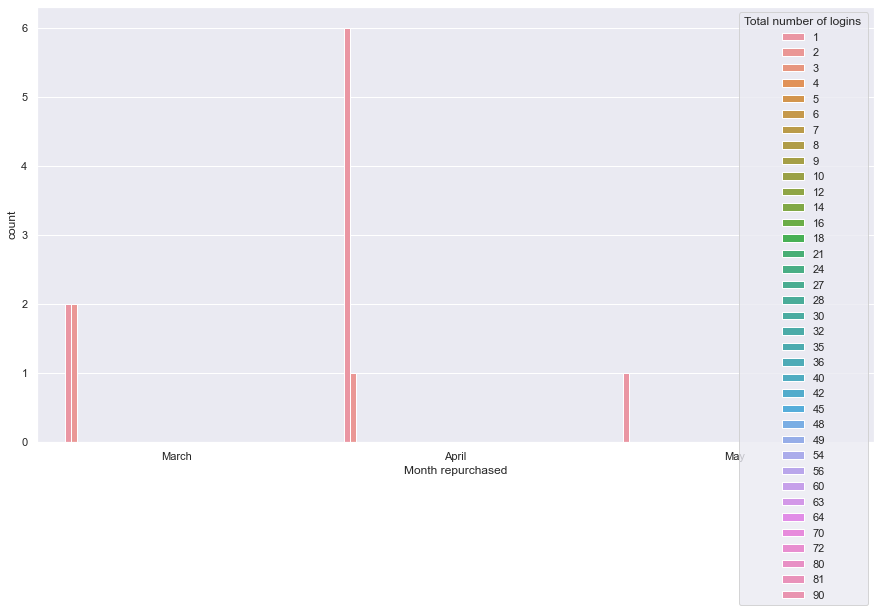

In [68]:
# Distribution of customer repurchased monthwise based on number of logins

plt.figure(figsize = (15, 8))
sns.countplot(data = df, x = 'Month repurchased', hue = 'Total number of logins ')
plt.show()

* People who didn't used to login earlier, repurchased the plan most.

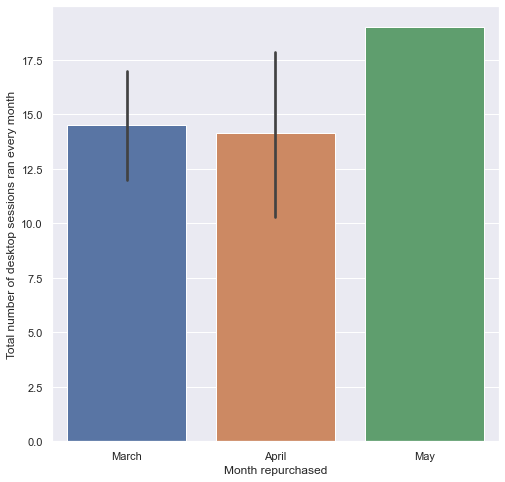

In [63]:
# Distribution of customers repurchased monthwise on the basis of desktop sessions

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Month repurchased', y = 'Total number of desktop sessions ran every month')
plt.show()

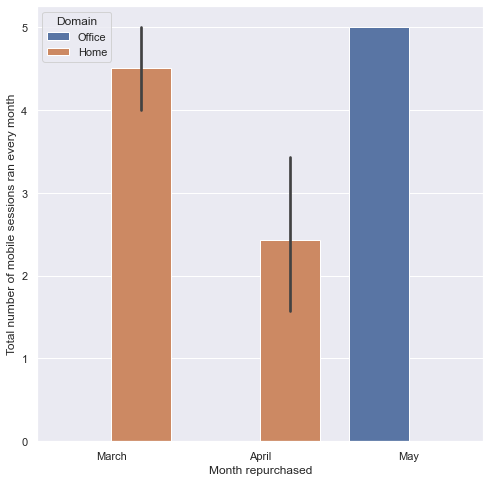

In [64]:
# Distribution of customers repurchased monthwise on the basis of mobile sessions and domain

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Month repurchased', y = 'Total number of mobile sessions ran every month', hue = 'Domain')
plt.show()

* Most of the company users who had several desktop sessions, repurchased the plan in `may`.
* Most domestic desktop users repurchased the plan in `march`.

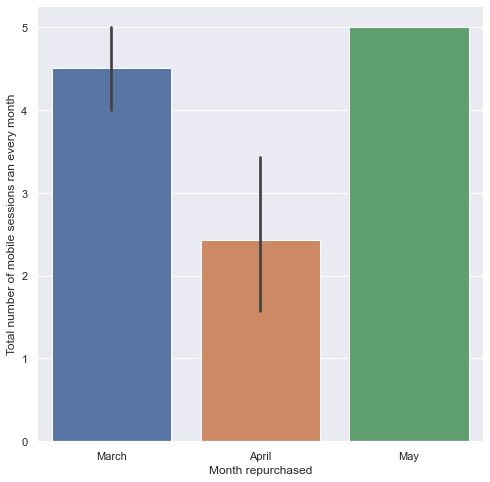

In [65]:
# Distribution of customers repurchased monthwise on the basis of mobile sessions

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Month repurchased', y = 'Total number of mobile sessions ran every month')
plt.show()

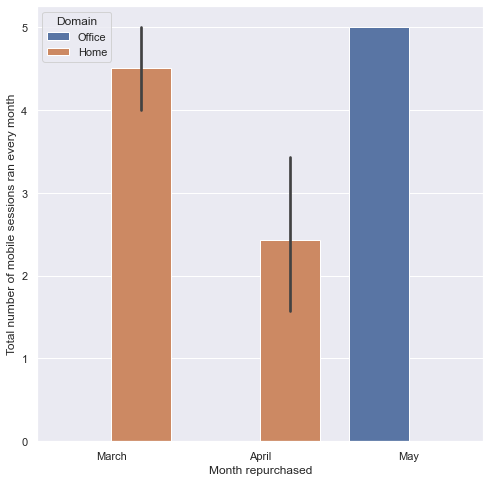

In [67]:
# Distribution of customers churned monthwise on the basis of mobile sessions and domain

plt.figure(figsize = (8, 8))
sns.barplot(data = df, x = 'Month repurchased', y = 'Total number of mobile sessions ran every month', hue = 'Domain')
plt.show()